In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tsfresh import select_features

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import RidgeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
feature_df = pd.read_csv('features.csv')
dir_df = pd.read_csv('directory.csv')

In [ ]:
feature_df = feature_df.iloc[:,2:]
feature_df.head()

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7,signal_name,target_original,target,target_encoded
0,0.0,0.0,0.0,0.0,-43.996870,190.991799,0.091753,-0.001167,0.000102,-0.466220,...,1.697517,2.230373,2.794168,3.286209,0.0,4.249653,100,+,Q,4
1,0.0,0.0,0.0,0.0,-39.192408,191.688213,0.073103,-0.000604,-0.000006,-0.428019,...,1.659906,2.171393,2.712120,3.211305,0.0,4.249653,100,N,N,0
2,0.0,0.0,0.0,0.0,12.218372,296.054579,0.061237,0.000793,-0.000043,-0.025884,...,1.659038,2.166456,2.681342,3.181041,0.0,5.709516,100,N,N,0
3,0.0,0.0,0.0,0.0,7.169075,240.717360,0.061860,0.000353,-0.000084,-0.033303,...,1.557158,2.032633,2.547036,3.025099,0.0,5.157989,100,N,N,0
4,0.0,0.0,0.0,0.0,2.791637,217.722236,0.059938,0.000530,-0.000139,-0.088944,...,1.629753,2.135749,2.669466,3.211105,0.0,4.832585,100,N,N,0


In [26]:
feature_df.target.value_counts()

target
N    90125
V     7009
Q     3006
S     2781
F      803
Name: count, dtype: int64

In [27]:
90125 + 7009 + 3006 + 2781 + 803

103724

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(feature_df.iloc[:, :-4]), np.array(feature_df.iloc[:,-1]), test_size=0.2, random_state=42, stratify=np.array(feature_df.iloc[:,-1]))

In [ ]:
f

In [ ]:
selected_feature_df = select_features(pd.DataFrame(X_train, columns=feature_df.iloc[:,:-4].columns.values), pd.Series(y_train))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(selected_feature_df)
ridge = RidgeClassifier(alpha=0.5)


ridge.fit(X_train_scaled, y_train)

coeff = np.abs(ridge.coef_)
meanC = np.mean(coeff, axis=0)
thresh = np.percentile(meanC, 90)
selected = selected_feature_df.columns[meanC > thresh]

X_train_reduced = np.array(selected_feature_df[selected])

X_test_reduced = pd.DataFrame(X_test, columns=feature_df.iloc[:,:-4].columns.values)
X_test_reduced = np.array(X_test_reduced[selected])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix_plot(y_true, y_pred):
    class_labels = ['N', 'S', 'V', 'F', 'Q']
    label_mapping = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}

    # Ensure correct mapping from numbers to labels
    if isinstance(y_true[0], int) or isinstance(y_true[0], np.integer):
        y_true_labels = [label_mapping[label] for label in y_true]
        y_pred_labels = [label_mapping[label] for label in y_pred]
    else:
        y_true_labels = y_true
        y_pred_labels = y_pred

    # Compute confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=class_labels)

    # Compute classification report (handling missing classes)
    report = classification_report(y_true_labels, y_pred_labels, target_names=class_labels, labels=class_labels, zero_division=0)
    print("\nClassification Report:\n", report)

    # Plot heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix')
    

In [10]:
xt = selected_feature_df[selected].copy()
xt.loc[:,'target'] = y_train
xt.to_csv('X_train_reduced.csv')
a = pd.DataFrame(X_test, columns=feature_df.iloc[:,:-4].columns.values)
a = a[selected]
a.loc[:,'target'] = y_test
a.to_csv('X_test_reduced.csv')


In [ ]:

def stratified_kfold_cv(X, y, model, n_splits=10):

    # Initialize StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize lists to store scores for each fold
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    scaler = StandardScaler()
    
    # Perform Stratified K-Fold Cross Validation
    for train_idx, val_idx in skf.split(X, y):
        # Get the training and validation sets for each fold
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_val_fold = scaler.transform(X_val_fold)
        # Train the model
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_val_pred = model.predict(X_val_fold)
        
        # Calculate Precision, Recall, F1 Score, and Accuracy for the current fold
        precision = precision_score(y_val_fold, y_val_pred, average='weighted')
        recall = recall_score(y_val_fold, y_val_pred, average='weighted')
        f1 = f1_score(y_val_fold, y_val_pred, average='weighted')
        accuracy = accuracy_score(y_val_fold, y_val_pred)
        
        # Append the scores for the fold
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        
        print(f"Fold Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Calculate and print the average scores across all folds
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_accuracy = np.mean(accuracy_scores)

    print("\nAverage Scores across all folds:")
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f}")

In [13]:
model_nb = GaussianNB()
stratified_kfold_cv(X_train_reduced, y_train, model_nb, n_splits=10)

Fold Accuracy: 0.7613, Precision: 0.8748, Recall: 0.7613, F1 Score: 0.8083
Fold Accuracy: 0.7564, Precision: 0.8723, Recall: 0.7564, F1 Score: 0.8042
Fold Accuracy: 0.7736, Precision: 0.8735, Recall: 0.7736, F1 Score: 0.8150
Fold Accuracy: 0.7680, Precision: 0.8809, Recall: 0.7680, F1 Score: 0.8145
Fold Accuracy: 0.7671, Precision: 0.8769, Recall: 0.7671, F1 Score: 0.8125
Fold Accuracy: 0.7563, Precision: 0.8731, Recall: 0.7563, F1 Score: 0.8048
Fold Accuracy: 0.7646, Precision: 0.8753, Recall: 0.7646, F1 Score: 0.8099
Fold Accuracy: 0.7656, Precision: 0.8743, Recall: 0.7656, F1 Score: 0.8105
Fold Accuracy: 0.7730, Precision: 0.8784, Recall: 0.7730, F1 Score: 0.8169
Fold Accuracy: 0.7728, Precision: 0.8774, Recall: 0.7728, F1 Score: 0.8164

Average Scores across all folds:
Average Accuracy: 0.7659
Average Precision: 0.8757
Average Recall: 0.7659
Average F1 Score: 0.8113


In [14]:
model_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
stratified_kfold_cv(X_train_reduced, y_train, model_knn, n_splits=10)

Fold Accuracy: 0.9640, Precision: 0.9627, Recall: 0.9640, F1 Score: 0.9610
Fold Accuracy: 0.9676, Precision: 0.9666, Recall: 0.9676, F1 Score: 0.9656
Fold Accuracy: 0.9649, Precision: 0.9635, Recall: 0.9649, F1 Score: 0.9617
Fold Accuracy: 0.9716, Precision: 0.9707, Recall: 0.9716, F1 Score: 0.9699
Fold Accuracy: 0.9658, Precision: 0.9649, Recall: 0.9658, F1 Score: 0.9633
Fold Accuracy: 0.9666, Precision: 0.9657, Recall: 0.9666, F1 Score: 0.9642
Fold Accuracy: 0.9659, Precision: 0.9646, Recall: 0.9659, F1 Score: 0.9635
Fold Accuracy: 0.9657, Precision: 0.9642, Recall: 0.9657, F1 Score: 0.9628
Fold Accuracy: 0.9651, Precision: 0.9632, Recall: 0.9651, F1 Score: 0.9619
Fold Accuracy: 0.9665, Precision: 0.9655, Recall: 0.9665, F1 Score: 0.9636

Average Scores across all folds:
Average Accuracy: 0.9664
Average Precision: 0.9652
Average Recall: 0.9664
Average F1 Score: 0.9637


In [15]:
model_rf = RandomForestClassifier(n_estimators = 500, max_depth = 10, n_jobs=-1, random_state=42)
stratified_kfold_cv(X_train_reduced, y_train, model_rf, n_splits=10)

Fold Accuracy: 0.9500, Precision: 0.9475, Recall: 0.9500, F1 Score: 0.9417
Fold Accuracy: 0.9522, Precision: 0.9520, Recall: 0.9522, F1 Score: 0.9454
Fold Accuracy: 0.9528, Precision: 0.9510, Recall: 0.9528, F1 Score: 0.9451
Fold Accuracy: 0.9544, Precision: 0.9548, Recall: 0.9544, F1 Score: 0.9478
Fold Accuracy: 0.9567, Precision: 0.9570, Recall: 0.9567, F1 Score: 0.9509
Fold Accuracy: 0.9526, Precision: 0.9521, Recall: 0.9526, F1 Score: 0.9457
Fold Accuracy: 0.9561, Precision: 0.9562, Recall: 0.9561, F1 Score: 0.9506
Fold Accuracy: 0.9523, Precision: 0.9527, Recall: 0.9523, F1 Score: 0.9445
Fold Accuracy: 0.9546, Precision: 0.9542, Recall: 0.9546, F1 Score: 0.9470
Fold Accuracy: 0.9538, Precision: 0.9542, Recall: 0.9538, F1 Score: 0.9471

Average Scores across all folds:
Average Accuracy: 0.9536
Average Precision: 0.9532
Average Recall: 0.9536
Average F1 Score: 0.9466


In [16]:
model = SVC(kernel='rbf')
stratified_kfold_cv(X_train_reduced, y_train, model, n_splits=10)

Fold Accuracy: 0.9654, Precision: 0.9640, Recall: 0.9654, F1 Score: 0.9619
Fold Accuracy: 0.9672, Precision: 0.9662, Recall: 0.9672, F1 Score: 0.9647
Fold Accuracy: 0.9652, Precision: 0.9635, Recall: 0.9652, F1 Score: 0.9616
Fold Accuracy: 0.9699, Precision: 0.9692, Recall: 0.9699, F1 Score: 0.9677
Fold Accuracy: 0.9681, Precision: 0.9669, Recall: 0.9681, F1 Score: 0.9655
Fold Accuracy: 0.9676, Precision: 0.9668, Recall: 0.9676, F1 Score: 0.9648
Fold Accuracy: 0.9683, Precision: 0.9672, Recall: 0.9683, F1 Score: 0.9660
Fold Accuracy: 0.9666, Precision: 0.9660, Recall: 0.9666, F1 Score: 0.9633
Fold Accuracy: 0.9690, Precision: 0.9681, Recall: 0.9690, F1 Score: 0.9662
Fold Accuracy: 0.9705, Precision: 0.9700, Recall: 0.9705, F1 Score: 0.9682

Average Scores across all folds:
Average Accuracy: 0.9678
Average Precision: 0.9668
Average Recall: 0.9678
Average F1 Score: 0.9650


In [17]:
model = SVC(kernel='linear')
stratified_kfold_cv(X_train_reduced, y_train, model, n_splits=10)

Fold Accuracy: 0.9446, Precision: 0.9407, Recall: 0.9446, F1 Score: 0.9363
Fold Accuracy: 0.9416, Precision: 0.9370, Recall: 0.9416, F1 Score: 0.9329
Fold Accuracy: 0.9413, Precision: 0.9382, Recall: 0.9413, F1 Score: 0.9324
Fold Accuracy: 0.9460, Precision: 0.9429, Recall: 0.9460, F1 Score: 0.9389
Fold Accuracy: 0.9471, Precision: 0.9429, Recall: 0.9471, F1 Score: 0.9396
Fold Accuracy: 0.9455, Precision: 0.9423, Recall: 0.9455, F1 Score: 0.9380
Fold Accuracy: 0.9470, Precision: 0.9440, Recall: 0.9470, F1 Score: 0.9403
Fold Accuracy: 0.9441, Precision: 0.9403, Recall: 0.9441, F1 Score: 0.9352
Fold Accuracy: 0.9488, Precision: 0.9450, Recall: 0.9488, F1 Score: 0.9418
Fold Accuracy: 0.9472, Precision: 0.9442, Recall: 0.9472, F1 Score: 0.9393

Average Scores across all folds:
Average Accuracy: 0.9453
Average Precision: 0.9417
Average Recall: 0.9453
Average F1 Score: 0.9375


In [18]:
model = SVC(kernel='poly')
stratified_kfold_cv(X_train_reduced, y_train, model, n_splits=10)

Fold Accuracy: 0.9591, Precision: 0.9571, Recall: 0.9591, F1 Score: 0.9548
Fold Accuracy: 0.9584, Precision: 0.9560, Recall: 0.9584, F1 Score: 0.9540
Fold Accuracy: 0.9576, Precision: 0.9551, Recall: 0.9576, F1 Score: 0.9524
Fold Accuracy: 0.9628, Precision: 0.9612, Recall: 0.9628, F1 Score: 0.9593
Fold Accuracy: 0.9635, Precision: 0.9619, Recall: 0.9635, F1 Score: 0.9598
Fold Accuracy: 0.9595, Precision: 0.9583, Recall: 0.9595, F1 Score: 0.9549
Fold Accuracy: 0.9585, Precision: 0.9562, Recall: 0.9585, F1 Score: 0.9544
Fold Accuracy: 0.9573, Precision: 0.9552, Recall: 0.9573, F1 Score: 0.9518
Fold Accuracy: 0.9595, Precision: 0.9571, Recall: 0.9595, F1 Score: 0.9549
Fold Accuracy: 0.9603, Precision: 0.9585, Recall: 0.9603, F1 Score: 0.9563

Average Scores across all folds:
Average Accuracy: 0.9597
Average Precision: 0.9577
Average Recall: 0.9597
Average F1 Score: 0.9553


In [19]:
model = SVC(kernel='sigmoid')
stratified_kfold_cv(X_train_reduced, y_train, model, n_splits=10)

Fold Accuracy: 0.8157, Precision: 0.8110, Recall: 0.8157, F1 Score: 0.8131
Fold Accuracy: 0.8188, Precision: 0.8106, Recall: 0.8188, F1 Score: 0.8145
Fold Accuracy: 0.8262, Precision: 0.8126, Recall: 0.8262, F1 Score: 0.8192
Fold Accuracy: 0.8429, Precision: 0.8117, Recall: 0.8429, F1 Score: 0.8260
Fold Accuracy: 0.8410, Precision: 0.8094, Recall: 0.8410, F1 Score: 0.8239
Fold Accuracy: 0.8351, Precision: 0.8081, Recall: 0.8351, F1 Score: 0.8206
Fold Accuracy: 0.8361, Precision: 0.8102, Recall: 0.8361, F1 Score: 0.8224
Fold Accuracy: 0.8244, Precision: 0.8107, Recall: 0.8244, F1 Score: 0.8173
Fold Accuracy: 0.8397, Precision: 0.8137, Recall: 0.8397, F1 Score: 0.8259
Fold Accuracy: 0.8428, Precision: 0.8126, Recall: 0.8428, F1 Score: 0.8264

Average Scores across all folds:
Average Accuracy: 0.8323
Average Precision: 0.8111
Average Recall: 0.8323
Average F1 Score: 0.8209


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Input, LSTM, Dense, Flatten, Dropout, BatchNormalization

In [12]:
def stratified_kfold_cv_nn(X, y, model, n_splits=10, batch_size=64, lstm=False):

    # Initialize StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize lists to store scores for each fold
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    scaler = StandardScaler()
    
    # Perform Stratified K-Fold Cross Validation
    for train_idx, val_idx in skf.split(X, y):
        # Get the training and validation sets for each fold
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_val_fold = scaler.transform(X_val_fold)
        
        if lstm == True:
            # Reshape to (samples, timesteps, features)
            X_train_fold = X_train_fold.reshape(X_train_fold.shape[0], X_train_fold.shape[1], 1)
            X_val_fold = X_val_fold.reshape(X_val_fold.shape[0], X_val_fold.shape[1], 1)
        
        # Train the model
        
        model.fit(
            X_train_fold, y_train_fold,
            epochs=20,
            batch_size=batch_size,
            validation_data=(X_val_fold, y_val_fold),
            verbose=0
        )
        
        # Predict on the validation fold
        y_val_pred = np.argmax(model.predict(X_val_fold), axis=1)
        
        # Calculate Precision, Recall, F1 Score, and Accuracy for the current fold
        precision = precision_score(y_val_fold, y_val_pred, average='weighted')
        recall = recall_score(y_val_fold, y_val_pred, average='weighted')
        f1 = f1_score(y_val_fold, y_val_pred, average='weighted')
        accuracy = accuracy_score(y_val_fold, y_val_pred)
        
        # Append the scores for the fold
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        
        print(f"Fold Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Calculate and print the average scores across all folds
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_accuracy = np.mean(accuracy_scores)

    print("\nAverage Scores across all folds:")
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f}")

In [ ]:
model_mlp = Sequential([
    Input(shape=(X_train_reduced.shape[1],)),
    Dense(256, activation='relu'),

    Dense(128, activation='relu'),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])


model_mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_sizes = [64]
for bs in batch_sizes:
    print(f'model_mlp batch_size: {bs}')
    stratified_kfold_cv_nn(X_train_reduced, y_train, model_mlp, n_splits=10, batch_size=bs, lstm=False)
    print('*' * 20)

model_mlp batch_size: 64
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold Accuracy: 0.9742, Precision: 0.9734, Recall: 0.9742, F1 Score: 0.9729
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold Accuracy: 0.9784, Precision: 0.9778, Recall: 0.9784, F1 Score: 0.9778
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold Accuracy: 0.9798, Precision: 0.9791, Recall: 0.9798, F1 Score: 0.9787
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold Accuracy: 0.9861, Precision: 0.9859, Recall: 0.9861, F1 Score: 0.9859
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold Accuracy: 0.9857, Precision: 0.9854, Recall: 0.9857, F1 Score: 0.9852
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold Accuracy: 0.9857, Precision: 0.9855, Recall: 0.9857, F1 Score: 0.9855
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold Accuracy: 0.9860, Precision: 0.9858, Recall: 0.9860, F1 Score: 0.9857
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold Accuracy: 0.9882, Precision: 0.9880, Recall: 0.9882, F1 Score: 0.9879
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold A

In [23]:
model_lstm = Sequential([
    Input(shape=(X_train_reduced.shape[1], 1)),


    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(32),


    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


for bs in batch_sizes:
    print(f'model_lstm batch_size: {bs}')
    stratified_kfold_cv_nn(X_train_reduced, y_train, model_lstm, n_splits=10, batch_size=bs, lstm=True)
    print('*' * 100)

model_lstm batch_size: 64
260/260 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
Fold Accuracy: 0.9578, Precision: 0.9551, Recall: 0.9578, F1 Score: 0.9548
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
Fold Accuracy: 0.9695, Precision: 0.9691, Recall: 0.9695, F1 Score: 0.9690
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
Fold Accuracy: 0.9765, Precision: 0.9760, Recall: 0.9765, F1 Score: 0.9762
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
Fold Accuracy: 0.9849, Precision: 0.9850, Recall: 0.9849, F1 Score: 0.9849
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step
Fold Accuracy: 0.9870, Precision: 0.9868, Recall: 0.9870, F1 Score: 0.9869
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step
Fold Accuracy: 0.9887, Precision: 0.9887, Recall: 0.9887, F1 Score: 0.9886
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
Fold Accuracy: 0.9911, Precision: 0.9910, Recall: 0.9911, F1 Score: 0.9910
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
Fold Accuracy: 0.9914, Precision: 0.9913, Recall: 0.9914, F1 Score: 0.9913
260/260 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/s

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, GlobalAveragePooling1D, Input

model_cnn = Sequential([
    Input(shape=(X_train_reduced.shape[1], 1)),  # Ensure X_train_reduced.shape[1] matches the number of features

    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),  # Increased pool size to downsample the sequence length

    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),  # Increased pool size

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Output layer for 5 classes
])

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

for bs in batch_sizes:
    print(f'model_mlp batch_size: {bs}')
    stratified_kfold_cv_nn(X_train_reduced, y_train, model_cnn, n_splits=10, batch_size=bs, lstm=True)
    print('*' * 100)

model_mlp batch_size: 64
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold Accuracy: 0.9724, Precision: 0.9716, Recall: 0.9724, F1 Score: 0.9717
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold Accuracy: 0.9795, Precision: 0.9794, Recall: 0.9795, F1 Score: 0.9794
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold Accuracy: 0.9814, Precision: 0.9825, Recall: 0.9814, F1 Score: 0.9819
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold Accuracy: 0.9908, Precision: 0.9909, Recall: 0.9908, F1 Score: 0.9909
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold Accuracy: 0.9931, Precision: 0.9931, Recall: 0.9931, F1 Score: 0.9931
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold Accuracy: 0.9943, Precision: 0.9943, Recall: 0.9943, F1 Score: 0.9943
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold Accuracy: 0.9947, Precision: 0.9947, Recall: 0.9947, F1 Score: 0.9947
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold Accuracy: 0.9957, Precision: 0.9956, Recall: 0.9957, F1 Score: 0.9956
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold A

In [ ]:
model_cnn = Sequential([
    Input(shape=(X_train_reduced.shape[1], 1)),  # Ensure X_train_reduced.shape[1] matches the number of features

    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),  # Increased pool size to downsample the sequence length

    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),  # Increased pool size

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Output layer for 5 classes
])


model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_cnn.fit(
            X_train_reduced.reshape(X_train_reduced.shape[0], X_train_reduced.shape[1],1), y_train,
            epochs=20,
            batch_size=64,
            verbose=1
        )
y_pred = np.argmax(model_cnn.predict(X_test_reduced.reshape(X_test_reduced.shape[0], X_test_reduced.shape[1],1)), axis=1)


Epoch 1/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9725 - loss: 0.0886
Epoch 2/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9707 - loss: 0.0913
Epoch 3/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9727 - loss: 0.0869
Epoch 4/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9728 - loss: 0.0857
Epoch 5/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9720 - loss: 0.0843
Epoch 6/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9728 - loss: 0.0832
Epoch 7/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9732 - loss: 0.0824
Epoch 8/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9722 - loss: 0.0872
Epoch 9/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9738 - loss: 0.0822
Epoch 10/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9735 - loss: 0.0829
Epoch 11/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9726 - loss: 0.0849
Epoch 12/20
1297/1297 ━━━━━━━━


Classification Report:
               precision    recall  f1-score   support

           N       0.97      0.99      0.98     18025
           S       0.89      0.56      0.69       556
           V       0.90      0.88      0.89      1402
           F       0.76      0.51      0.61       161
           Q       0.76      0.58      0.66       601

    accuracy                           0.96     20745
   macro avg       0.86      0.71      0.77     20745
weighted avg       0.95      0.96      0.95     20745



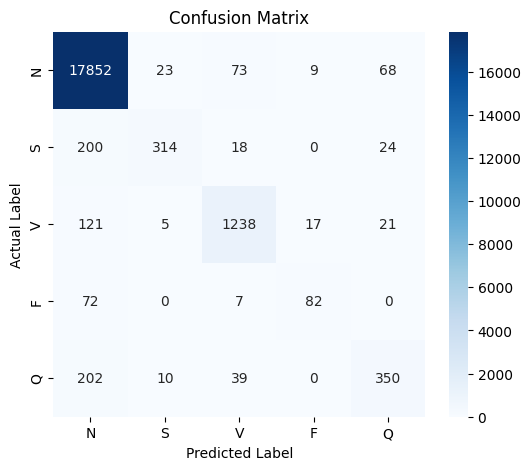

In [20]:
confusion_matrix_plot(y_test, y_pred)

In [23]:
def plot_history(history):
    """Plots training and validation accuracy and loss curves."""
    epochs = range(1, len(history.history['loss']) + 1)
    
    # Create a figure with two subplots
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training Accuracy')

    plt.show()

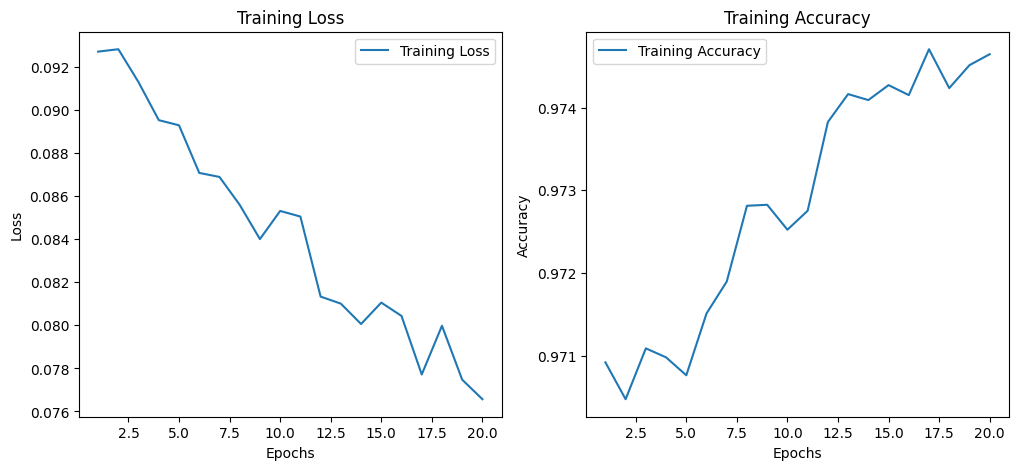

In [24]:
plot_history(history)